<a href="https://colab.research.google.com/github/jchou03/art_era_ai/blob/main/art_era_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA UPLOAD

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from google.colab import files
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import random
from random import sample
import zipfile
from PIL import Image
import os
import numpy as np
import seaborn as sns


drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Data/art_era_ai_df.csv')
df.info()


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 7 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   https://www.artic.edu/iiif/2/a28e4e8f-f072-092a-52f9-b165c97c7a0a/full/600,/0/default.jpg  699 non-null    int64 
 1   Title                                                                                      699 non-null    object
 2   Year                                                                                       699 non-null    int64 
 3   Title_URL                                                                                  699 non-null    object
 4   Image                                                                                      699 non-null    object
 5   Artist                          

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
def extract_year_from_title(title):
    # Use regular expressions to find a 4-digit number in the title
    match = re.search(r'\b\d{4}\b', title)
    if match:
        year = int(match.group(0))
        return year
    else:
        match = re.search(r'(\d{4})s', title)
        if match:
          year = int(match.group(1))
          return year
        else:
          print("fail")


def getdecade(df):
  decade = []
  for i in range(len(df)):
    (title, year) = df.loc[i, "Title"], df.loc[i, "Year"]
    if year != 1972:
      decadeval = year - (year % 10)
      #print(decadeval, year)
      decade.append(decadeval)
    else:
      newyear = extract_year_from_title(title)
      decadeval = newyear - (newyear % 10)
      #print(decadeval, year)
      decade.append(decadeval)
  return decade


df['Decade'] = getdecade(df)
df = df.replace(4650, 1950)

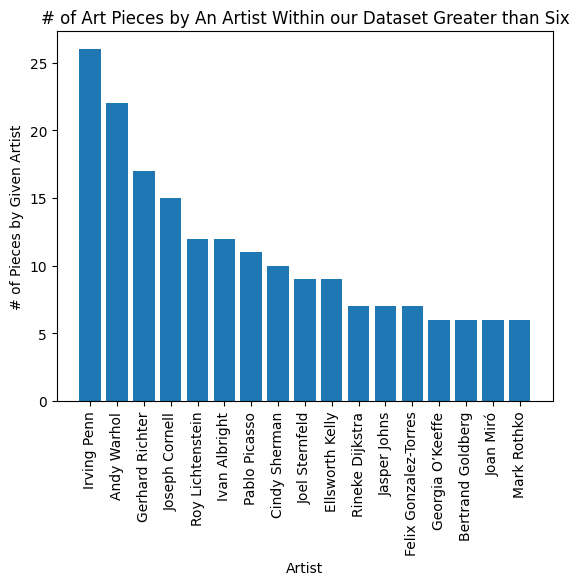

In [13]:
grouped_data = df['Artist'].value_counts().reset_index()
grouped_data.columns = ['Group', 'Count']
grouped_data = grouped_data[grouped_data['Count'] >= 6]
plt.bar(grouped_data['Group'], grouped_data['Count'])
plt.xlabel('Artist')
plt.xticks(rotation=90)
plt.ylabel('# of Pieces by Given Artist')
plt.title('# of Art Pieces by An Artist Within our Dataset Greater than Six')
plt.show()


<BarContainer object of 8 artists>

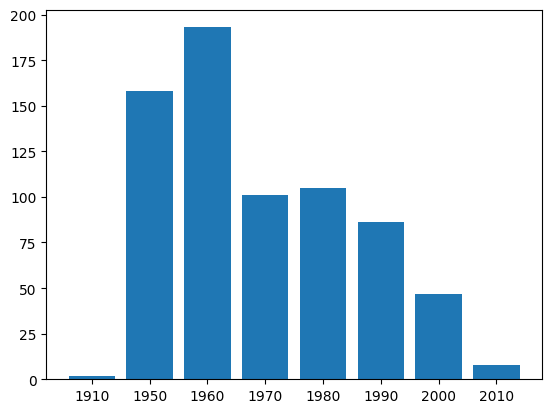

In [ ]:
#df.groupby(['Decade']).count()
x = ['1910', '1950', '1960', '1970', '1980', '1990', '2000', '2010']
y = [2, 158, 193, 101, 105, 86, 47, 8]
plt.bar(x, y)

In [ ]:
from pandas.core.frame import DataFrame
from IPython.display import HTML
def Create_Link(df):
  i = 0
  for x in range(len(df)):
    input = df.loc[x, "Image"]
    #index = df.loc[x, "index"]
    html = f'<a href={input}>{i}</a>'
    df = df.replace(input, html)
    i += 1
  return df


In [18]:
labels = df["Decade"]
images = df['Image']
len(labels)

699

In [ ]:
"""sample = sample(list(images), 20)"""

'sample = sample(list(images), 20)'

In [ ]:
def get_largest(images):
  imageone = io.imread(images[0])
  maxwidth =  imageone.shape[1]
  maxheight = imageone.shape[0]
  for x in (images):
    image = io.imread(x)
    width =  image.shape[1]
    height = image.shape[0]
    if width > maxwidth:
        maxwidth = width
    if height > maxheight:
        maxheight = height
  return maxwidth, maxheight

def get_smallest(images):
  imageone = io.imread(images[0])
  minwidth =  imageone.shape[1]
  minheight = imageone.shape[0]
  for x in (images):
    image = io.imread(x)
    width =  image.shape[1]
    height = image.shape[0]
    if width < minwidth:
        minwidth = width
    if height < minheight:
        minheight = height
  return minwidth, minheight


## GOT SOME IMAGES THAT WERE STILL RECTANGULAR SO ADDED A RESIZE AFTER CROP TO ENSURE THAT THEY ALL BECOME SQUARES BUT MIGHT BE CAUSING THE ERROR LATER

In [106]:
def resize(sample):
  crop_img_list = []
  for url in sample:
    image = io.imread(url)
    width =  image.shape[1]
    height = image.shape[0]
    if width == height:
        #cv2_imshow(cv.resize(image, (255, 255), interpolation = cv.INTER_AREA)
        crop_img_list.append(cv.resize(image, (255, 255), interpolation = cv.INTER_AREA))
        #print(image.shape)
        #print("here")
    else:
      mid_x, mid_y = int(width/2), int(height/2)
      if 255 < width:
          crop_width = int(255/2)
          if 255 < height:
              crop_height = int(255/2)
              crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
          else:
              crop_height = int(crop_height/2)
              crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
      else:
          if 255 < height:
              crop_width = int(crop_width/2)
              crop_height = int(255/2)
              crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
          else:
              crop_width = int(crop_width/2)
              crop_height = int(crop_height/2)
              crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
      crop_img = cv.resize(crop_img, (255, 255), interpolation = cv.INTER_AREA)
      crop_img_list.append(crop_img)
      #print(image.shape)

  return crop_img_list
    #cv2_imshow(crop_img)
    #print('\n')


"""result = resize(sample)
cv2_imshow(result[2])"""

'result = resize(sample)\ncv2_imshow(result[2])'

In [ ]:
def invert_img(sample):
  for url in sample:
    image = io.imread(url)
    cv2_imshow(image)
    image = ~image
    cv2_imshow(image)



In [ ]:
def BW_convert(sample):
  for url in sample:
    image = io.imread(url)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    cv2_imshow(gray)


In [ ]:
def HSV_convert(sample):
  for url in sample:
    image = io.imread(url)
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    cv2_imshow(hsv)



In [ ]:
def sampling(images):
  for x in images:
      image = io.imread(x)
      plt.imshow(image/255)



# NOTE GETTING A ValueError: could not broadcast input array from shape (128,128,3) into shape (128,128) ERROR UNSURE HOW TO FIX

In [105]:
img_array = resize(images)
img_array = np.array(img_array)

NameError: ignored

In [103]:
len(img_array)

10

In [101]:
print(img_array[0])

[[[  2  53  98]
  [  7  59 107]
  [  7  59 109]
  ...
  [  6  36  86]
  [  2  29  76]
  [  3  22  64]]

 [[  3  56 106]
  [  4  62 112]
  [  1  59 109]
  ...
  [  3  29  78]
  [  5  29  75]
  [  2  25  67]]

 [[  0  53 107]
  [  2  59 114]
  [  2  60 110]
  ...
  [  3  27  71]
  [  6  29  73]
  [ 12  35  76]]

 ...

 [[  0  48 102]
  [  1  48 104]
  [  4  45 101]
  ...
  [  0  80 120]
  [  0  78 117]
  [  1  70 111]]

 [[  2  43  99]
  [  9  49 110]
  [  8  44 104]
  ...
  [  0  78 117]
  [  3  76 117]
  [  3  68 108]]

 [[  5  42  97]
  [  3  42 101]
  [  5  41 101]
  ...
  [  2  76 115]
  [  5  73 112]
  [  5  63 103]]]


# WAS GETTING A ERROR index 1950 is out of bounds for axis 1 with size 8. I was able to fix this adding y_train = pd.DataFrame(index=np.arange(700)), y_test = pd.DataFrame(index=np.arange(700)) BUT idk if this is correct approach

(255, 255, 3)


IndexError: ignored

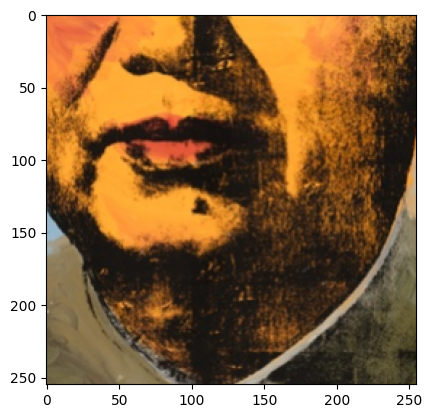

In [90]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

x_train, x_test, y_train, y_test = train_test_split(img_array, labels)

print(x_train[0].shape)

x_train = x_train/255.0
x_test = x_test/255.0

"""x_train = x_train.reshape((-1,28,28, 3)) #NOT SURE IF WE NEED
x_test = x_test.reshape((-1,28,28, 3)) #NOT SURE IF WE NEED
"""

plt.imshow(x_train[0])

#ERROR OUT OF BOUNDS BC DIMENSIONS AREN'T RIGHT
num_classes = 8
y_train = pd.DataFrame(index=np.arange(700))
y_test = pd.DataFrame(index=np.arange(700))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



#### Architecture One

In [89]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
#input_shape = (-1,28,28)
#input_shape = (28,28,1)


model1 = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model1.summary()



batch_size = 128
epochs = 15
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 246016)            0         
                                                                 
 dropout_1 (Dropout)         (None, 246016)           

ValueError: ignored

## Architecture Two

##Architecture Three

## Architecture Four